<a href="https://colab.research.google.com/github/situdame/github-slideshow/blob/main/%E3%80%8CDNN%E8%A8%93%E7%B7%B4%E6%A8%A1%E5%9E%8B%E9%A0%90%E6%B8%AC%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_labels[0]

5

In [ ]:
print(train_images.shape,train_labels.shape,sep='\n')

(60000, 28, 28)
(60000,)


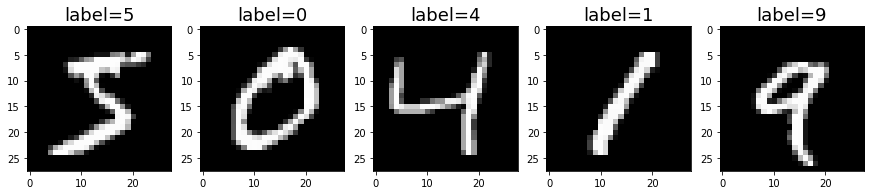

In [ ]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(15,4)
for i in range(5):
    ax=plt.subplot(1,5,1+i)
    ax.imshow(train_images[i],cmap='gray')
    ax.set_title('label='+str(train_labels[i]),fontsize=18)
plt.show()

In [ ]:
x_train=train_images.reshape((60000,28*28))
x_train=x_train.astype('float32')/255

x_test=test_images.reshape((10000,28*28))
x_test=x_test.astype('float32')/255

print(train_images.shape,test_images.shape,x_train.shape,x_test.shape,sep='\n')

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)
print(train_labels[0],y_train[0],sep='\n')
print(train_labels.shape,test_labels.shape,y_train.shape,y_test.shape,sep='\n')

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000,)
(10000,)
(60000, 10)
(10000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(512,activation='relu',input_dim=784))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2558 - acc: 0.9255
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1024 - acc: 0.9695
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0681 - acc: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0491 - acc: 0.9854
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0372 - acc: 0.9888


In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('對測試資料集的損失值:%.4f,對測試資料集的準確率:%.4f' % (test_loss,test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0696 - acc: 0.9801
對測試資料集的損失值:0.0696,對測試資料集的準確率:0.9801


In [ ]:
predict=model.predict(x_test)
predict.round(1)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
predict=np.argmax(model.predict(x_test), axis=-1)
print(predict,test_labels,sep='\n')

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


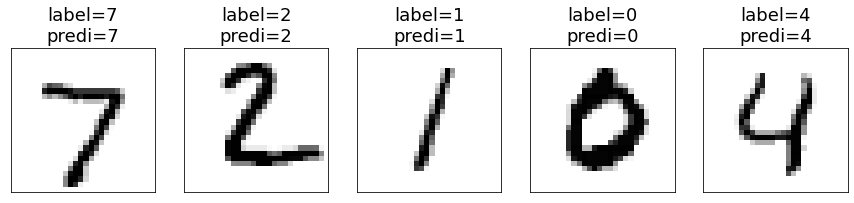

In [ ]:

plt.gcf().set_size_inches(15,4)
for i in range(5):
    ax=plt.subplot(1,5,1+i)
    ax.imshow(test_images[i],cmap='binary')
    ax.set_title('label='+str(test_labels[i])+'\npredi='+str(predict[i]),fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [ ]:
model.save('MnistModel.h5')

In [ ]:
del model